# **IMAGE CLASSIFICATION FOR IMAGE DATA**

## **IMPORTING LIBRARIES AND CREATING BASE MODEL - CNN**

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Create a simple CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
model = create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## **TRAINING OVER BASE MODEL**

In [ ]:
# Train the model on balanced data

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.8904 - loss: 0.3558 - val_accuracy: 0.9837 - val_loss: 0.0488
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9843 - loss: 0.0503 - val_accuracy: 0.9873 - val_loss: 0.0377
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9899 - loss: 0.0321 - val_accuracy: 0.9880 - val_loss: 0.0365
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9925 - loss: 0.0235 - val_accuracy: 0.9902 - val_loss: 0.0277
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9945 - loss: 0.0188 - val_accuracy: 0.9915 - val_loss: 0.0268


## **REPRESENTING TRAINING METRICS OVER PLOTTING TOOLS**

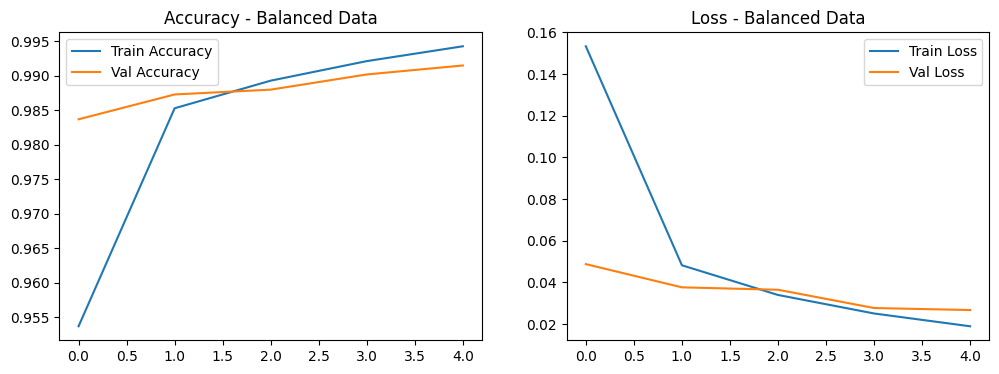

In [ ]:
# Plot training metrics
def plot_metrics(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Accuracy - {title}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss - {title}')
    plt.legend()
    plt.show()

plot_metrics(history, 'Balanced Data')

## **CREATING BIASED DATASET**

In [ ]:
# Create a biased dataset by removing some digit samples
np.random.seed(42)
bias_ratio = {0: 0.2, 1: 0.2, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 0.2, 9: 0.2}
# We are considering an 'index' with less than 1 bias ratio, randomly.
indices = np.array([i for i in range(len(y_train)) if np.random.rand() < bias_ratio[y_train[i]]])
x_train_biased, y_train_biased = x_train[indices], y_train[indices]

## **RETRAINING OVER BIASED DATASET**

Epoch 1/5
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.8852 - loss: 0.3707 - val_accuracy: 0.9737 - val_loss: 0.0853
Epoch 2/5
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9839 - loss: 0.0526 - val_accuracy: 0.9737 - val_loss: 0.0833
Epoch 3/5
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.9883 - loss: 0.0373 - val_accuracy: 0.9800 - val_loss: 0.0626
Epoch 4/5
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9925 - loss: 0.0235 - val_accuracy: 0.9839 - val_loss: 0.0538
Epoch 5/5
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.9950 - loss: 0.0156 - val_accuracy: 0.9764 - val_loss: 0.0742


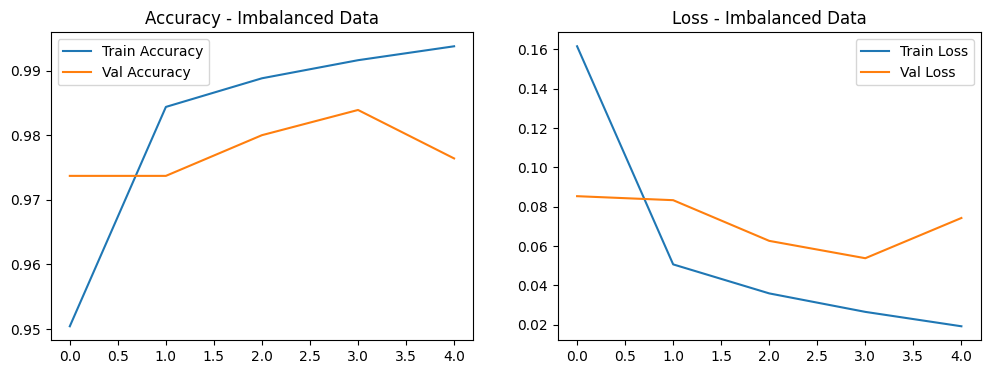

In [ ]:
# Retrain the model on imbalanced data
model_biased = create_model()
history_biased = model_biased.fit(x_train_biased, y_train_biased, epochs=5, validation_data=(x_test, y_test))
plot_metrics(history_biased, 'Imbalanced Data')

# **USING CLASS WEIGHTS FOR INCREASING ACCURACY FOR BIASED DATASET**

In [ ]:
# Compute class weights
y_train_biased_classes = np.unique(y_train_biased)
class_weights = compute_class_weight('balanced', classes=y_train_biased_classes, y=y_train_biased)
class_weight_dict = {i: class_weights[i] for i in y_train_biased_classes}

## **RETRAINING OVER BIASED DATASET USING CLASS WEIGHTS**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - accuracy: 0.8672 - loss: 0.4426 - val_accuracy: 0.9785 - val_loss: 0.0684
Epoch 2/5
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9797 - loss: 0.0697 - val_accuracy: 0.9806 - val_loss: 0.0607
Epoch 3/5
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.9862 - loss: 0.0451 - val_accuracy: 0.9872 - val_loss: 0.0395
Epoch 4/5
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9898 - loss: 0.0321 - val_accuracy: 0.9884 - val_loss: 0.0354
Epoch 5/5
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9935 - loss: 0.0194 - val_accuracy: 0.9869 - val_loss: 0.0402


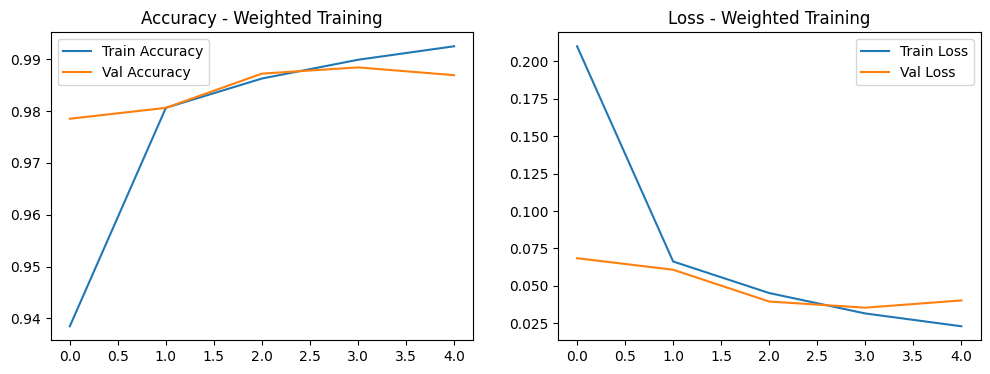

In [ ]:
# Retrain using class weights
model_weighted = create_model()
history_weighted = model_weighted.fit(x_train_biased, y_train_biased, epochs=5, validation_data=(x_test, y_test), class_weight=class_weight_dict)
plot_metrics(history_weighted, 'Weighted Training')